# Is your Honey Adulterated?

# Data Cleaning and Visualization

In [69]:
import os # for file access
import pandas as pd # for data processing
import numpy as np # for math processing

# for plotting
import plotly.express as px

np.random.seed(33)

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


In [71]:

# Load the dataset
#file = ('D:\Research\Honey Adulteration\new\generated_data.xlsx')
file = ('D:\\Research\\Honey Adulteration\\new\\generated_data.xlsx')
df = pd.read_excel(file)
data = pd.read_excel(file)
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [72]:
df = df.iloc[:, 3:]
df.head()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,0.406472,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,0.409146,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,0.406457,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,0.406622,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,0.411752,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [73]:
df = df.iloc[:, :-1]
df.head()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
0,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,0.406472,...,0.478828,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122
1,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,0.409146,...,0.479155,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472
2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,0.406457,...,0.478425,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424
3,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,0.406622,...,0.478136,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337
4,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,0.411752,...,0.478160,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432


In [74]:
df.shape

(34800, 129)

In [75]:
df.dtypes.value_counts()

float64    128
int64        1
Name: count, dtype: int64

# Data aggregation and visualization

In [76]:
mean_df = df.groupby('Concentration').mean()
mean_df

,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,444.43nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
Concentration,,,,,,,,,,,,,,,,,,,,,
5,0.998821,0.998345,0.994433,0.984029,0.948815,0.872901,0.745024,0.588936,0.452865,0.351547,...,0.430981,0.431273,0.435387,0.442722,0.454869,0.471874,0.489746,0.508846,0.530260,0.555735
10,0.998963,0.998322,0.993987,0.983952,0.949477,0.874017,0.747774,0.592468,0.456230,0.354685,...,0.433468,0.434208,0.438730,0.446352,0.458869,0.476117,0.494107,0.513411,0.535130,0.560718
25,0.999401,0.998563,0.992451,0.984316,0.951487,0.876986,0.754881,0.603006,0.467073,0.365598,...,0.442074,0.444068,0.449784,0.457934,0.471382,0.489077,0.507190,0.526916,0.549224,0.574937
50,0.999826,0.999373,0.990827,0.986394,0.956113,0.882561,0.763952,0.617822,0.482158,0.381321,...,0.457565,0.461649,0.469405,0.478081,0.492980,0.511292,0.529267,0.549442,0.572348,0.598200


In [77]:
mean_df = df.groupby('Concentration').mean().T
mean_df

Concentration,5,10,25,50
399.40nm,0.998821,0.998963,0.999401,0.999826
404.39nm,0.998345,0.998322,0.998563,0.999373
409.38nm,0.994433,0.993987,0.992451,0.990827
414.37nm,0.984029,0.983952,0.984316,0.986394
419.37nm,0.948815,0.949477,0.951487,0.956113
...,...,...,...,...
1041.92nm,0.471874,0.476117,0.489077,0.511292
1047.38nm,0.489746,0.494107,0.507190,0.529267
1052.85nm,0.508846,0.513411,0.526916,0.549442
1058.32nm,0.530260,0.535130,0.549224,0.572348


In [78]:
# plotting dataframe mean_df

fig = px.line(mean_df, 
              template = 'plotly_white', 
              width = 800, 
              height = 400
              )
fig.update_layout(legend_x = 0.7, 
                  legend_bgcolor = 'rgba(0,0,0,0)', 
                  legend_bordercolor = 'lightgray', 
                  legend_borderwidth = 2, 
                  title = 'Average Raman Spectrum for Each Honey class'
                  )
fig.update_xaxes(title = 'wavenumber')
fig.update_yaxes(title = 'intensity')


# Exploratory Data Analysis using Unsupervised Learning

# By using PCA (Principal Component Analysis)

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
X = df.select_dtypes('number')
y = df.Concentration

X = data.select_dtypes('number')
y = data.Concentration

# instantiating our standard scaler
scaler = StandardScaler()
# instantiating our PCA
# give me enough PCAs to account for 80 percent of variance within this dataset
# so that if the data has some variant
# we can build an unsupervised model that explains atleast 80 percent of that variance
pca = PCA(.80)

In [81]:
# This will take the z scale to fit the data
# This will basically subtract the mean of each variable and then dividing by the standard deviation
# We do this because some of the variables have a really large value, which might skew the entire data
# because it has a large magnitude while the smaller magnitude variables might be important
scaled_x = scaler.fit_transform(X)

In [82]:
# fitting of PCA
# we asked PCA to model upto 80 percent of variance
# therefore we need to know how many components we have so that we can build our dataframe
scores = pca.fit_transform(scaled_x)
num_components = min(scores.shape)
pc_cols = ['pc'+str(i+1) for i in range(num_components)]
pc_cols

['pc1', 'pc2']

In [83]:
# Building our dataframe this makes plotting easier as dataframes are indexed
scores_df = pd.DataFrame(scores, columns=pc_cols)
scores_df.head()

# In the generated output we can see how each column of the dataframe is a principal component

,pc1,pc2
0,2.754097,-8.971770
1,2.393285,-8.867851
2,2.799869,-8.939157
3,2.922214,-8.913433
4,2.416938,-8.667449


In [84]:
# Now, we will merge the Y data back on the dataset
# The Y data was actually the target data so this actually tells us what each sample is
# whether it is adulterated or pure
scores_df = pd.merge(y, scores_df, left_index = True, right_index = True)
scores_df.head()

,Concentration,pc1,pc2
0,5,2.754097,-8.971770
1,5,2.393285,-8.867851
2,5,2.799869,-8.939157
3,5,2.922214,-8.913433
4,5,2.416938,-8.667449


[Text(0.5, 1.0, 'Scores Plot')]

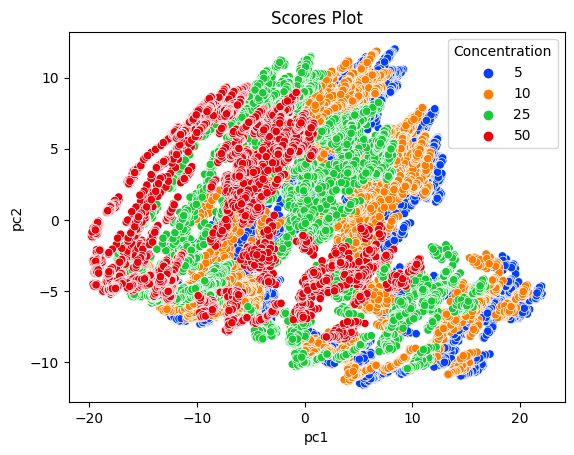

In [85]:
import seaborn as sns
# Now, we will build a scatterplot
sns.scatterplot(data=scores_df,
                x = 'pc1',
                y = 'pc2',
                hue = 'Concentration',
                palette='bright'
                ).set(title = 'Scores Plot')

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



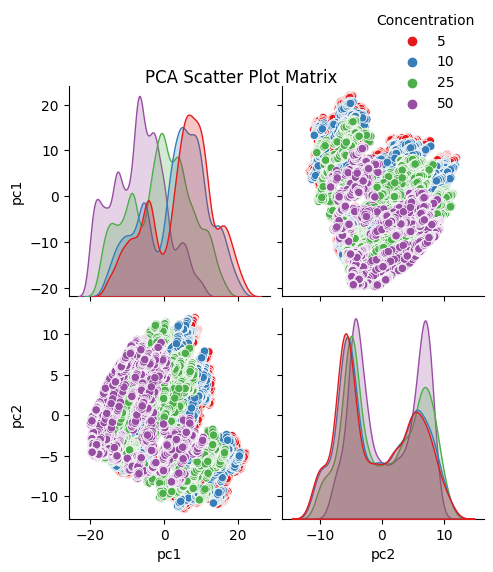

In [86]:
# creating a scatterplot matrix of the first five principal components
# also known as pairplots
# We will be plotting the first five principal components

fig = sns.pairplot(scores_df,
                   vars=['pc1', 'pc2'],
                   hue = 'Concentration',  # setting color according to the value of target variable
                   #height = 1.5 # setting the height of the dataframe
                   palette='Set1'
                   )

# setting the legend position
fig._legend.set_bbox_to_anchor((0.8, 1.02))

# to add title
fig.fig.suptitle('PCA Scatter Plot Matrix',
                 y=1.01, # sets title y location
                 x = 0.4 # sets title x-location
                 );

plt.show()


# Using K-means Clustering

In [87]:
df.describe()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
count,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,...,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000,34800.000000
mean,22.500000,0.999253,0.998651,0.992924,0.984673,0.951473,0.876616,0.752908,0.600558,0.464581,...,0.441022,0.442799,0.448326,0.456272,0.469525,0.487090,0.505077,0.524654,0.546740,0.572397
std,17.500251,0.001165,0.001873,0.006090,0.007181,0.012712,0.021243,0.031885,0.043343,0.045930,...,0.049209,0.050438,0.051272,0.050960,0.051782,0.051855,0.049996,0.048683,0.048895,0.046656
min,5.000000,0.992999,0.986369,0.970325,0.963224,0.922228,0.817380,0.654700,0.479338,0.346297,...,0.356309,0.354933,0.358461,0.366430,0.378593,0.396356,0.416595,0.438341,0.462133,0.486239
25%,8.750000,0.999113,0.997857,0.988654,0.978984,0.943905,0.868026,0.745928,0.584835,0.444799,...,0.401928,0.403584,0.408647,0.416194,0.428434,0.445814,0.464878,0.484848,0.506487,0.534049
50%,17.500000,0.999787,0.999537,0.994979,0.984087,0.947541,0.873950,0.760605,0.612300,0.474895,...,0.430777,0.432196,0.438787,0.447032,0.459491,0.476461,0.495128,0.514808,0.536738,0.564426
75%,31.250000,0.999983,0.999963,0.998257,0.990848,0.958219,0.888674,0.772464,0.629705,0.494272,...,0.481830,0.483427,0.489403,0.497201,0.510495,0.528256,0.545780,0.565247,0.586239,0.611635
max,50.000000,1.000000,1.000000,0.999934,0.999370,0.986879,0.936527,0.815805,0.679837,0.551331,...,0.569149,0.573177,0.579698,0.583502,0.597780,0.612889,0.622228,0.634197,0.658376,0.676430


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34800 entries, 0 to 34799
Columns: 129 entries, Concentration to 1063.79nm
dtypes: float64(128), int64(1)
memory usage: 34.3 MB


In [89]:
df.Concentration.value_counts()

Concentration
5     8700
10    8700
25    8700
50    8700
Name: count, dtype: int64

In [90]:
df.isnull()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
df.isnull().sum()

Concentration    0
399.40nm         0
404.39nm         0
409.38nm         0
414.37nm         0
                ..
1041.92nm        0
1047.38nm        0
1052.85nm        0
1058.32nm        0
1063.79nm        0
Length: 129, dtype: int64

In [92]:
df.head()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
0,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,0.551524,0.406472,...,0.478828,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122
1,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,0.554449,0.409146,...,0.479155,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472
2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,0.551499,0.406457,...,0.478425,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424
3,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,0.551494,0.406622,...,0.478136,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337
4,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,0.556812,0.411752,...,0.478160,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432


In [93]:
df.tail()

,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,434.40nm,439.41nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
34795,50,1.0,0.999997,0.999099,0.997805,0.979744,0.926800,0.803515,0.653183,0.519954,...,0.526237,0.529077,0.536940,0.544678,0.556919,0.573837,0.585928,0.600369,0.624429,0.641758
34796,50,1.0,0.999997,0.999107,0.997803,0.979665,0.926574,0.803181,0.652737,0.519424,...,0.525548,0.528273,0.536152,0.543827,0.556030,0.572911,0.585012,0.599393,0.623512,0.640791
34797,50,1.0,0.999997,0.999179,0.997876,0.979906,0.926780,0.802193,0.650484,0.516566,...,0.526276,0.528821,0.536617,0.544050,0.556245,0.573081,0.584958,0.599088,0.623318,0.640224
34798,50,1.0,0.999997,0.999209,0.997914,0.979959,0.926813,0.801949,0.649819,0.515714,...,0.525393,0.527751,0.535567,0.542928,0.555074,0.571904,0.583730,0.597731,0.622079,0.638918
34799,50,1.0,0.999997,0.999183,0.997865,0.979699,0.926315,0.801608,0.649810,0.515946,...,0.524851,0.527265,0.535118,0.542551,0.554722,0.571558,0.583480,0.597570,0.621863,0.638831


In [94]:
df.columns

Index(['Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm',
       '419.37nm', '424.38nm', '429.38nm', '434.40nm', '439.41nm',
       ...
       '1014.66nm', '1020.10nm', '1025.55nm', '1031.00nm', '1036.46nm',
       '1041.92nm', '1047.38nm', '1052.85nm', '1058.32nm', '1063.79nm'],
      dtype='object', length=129)

In [95]:
import matplotlib.pyplot as plt

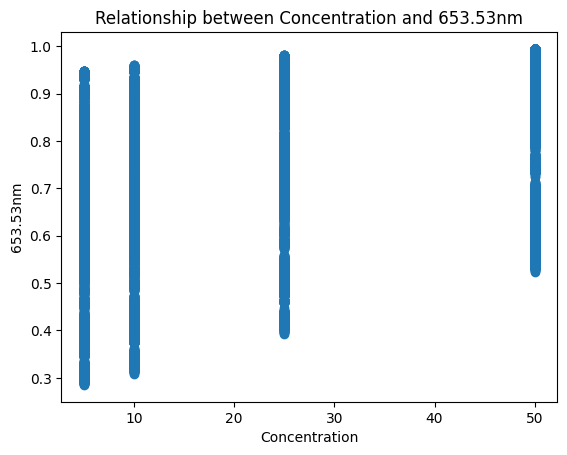

In [96]:
# Create the scatter plot
plt.scatter(x=df['Concentration'], y=df['653.53nm'])
plt.title("Relationship between Concentration and 653.53nm")
plt.xlabel("Concentration")
plt.ylabel("653.53nm")
plt.show()


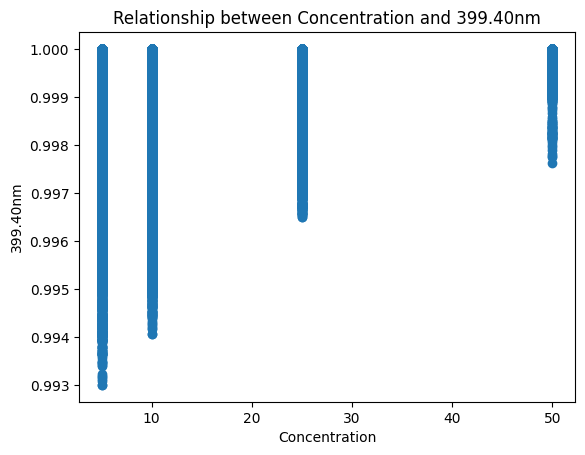

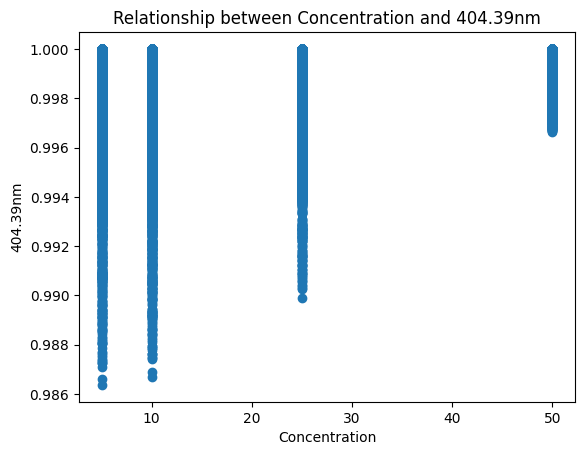

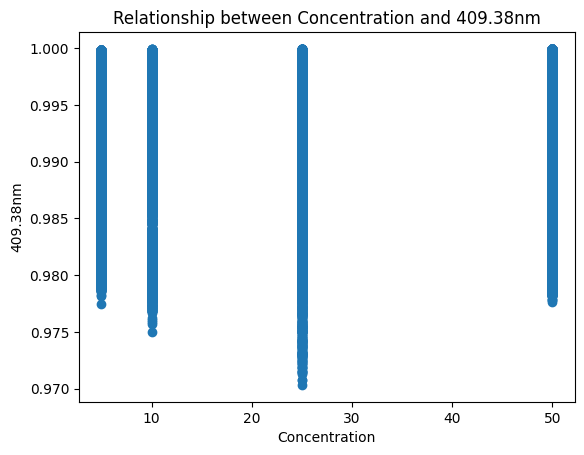

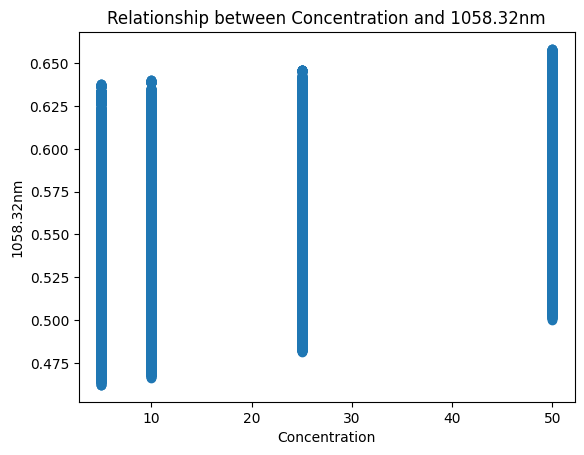

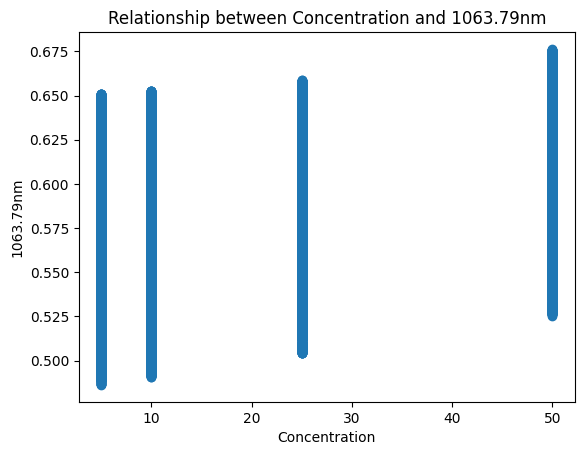

In [97]:
# Get the column names excluding the target variable
column_names = df.columns.drop(['Concentration'])

# Create a scatter plot for the first three column names
for column in column_names[:3]:
    plt.scatter(x=df['Concentration'], y=df[column])
    plt.title(f"Relationship between Concentration and {column}")
    plt.xlabel("Concentration")
    plt.ylabel(column)
    plt.show()

# Create a scatter plot for the last two column names
for column in column_names[-2:]:
    plt.scatter(x=df['Concentration'], y=df[column])
    plt.title(f"Relationship between Concentration and {column}")
    plt.xlabel("Concentration")
    plt.ylabel(column)
    plt.show()

# Elbow Method

In [98]:
x1 = df.loc[:, ["Concentration", "653.53nm"]].values
x1

array([[ 5.        ,  0.6422894 ],
       [ 5.        ,  0.6503638 ],
       [ 5.        ,  0.6412487 ],
       ...,
       [50.        ,  0.99091196],
       [50.        ,  0.99108344],
       [50.        ,  0.99095178]])

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

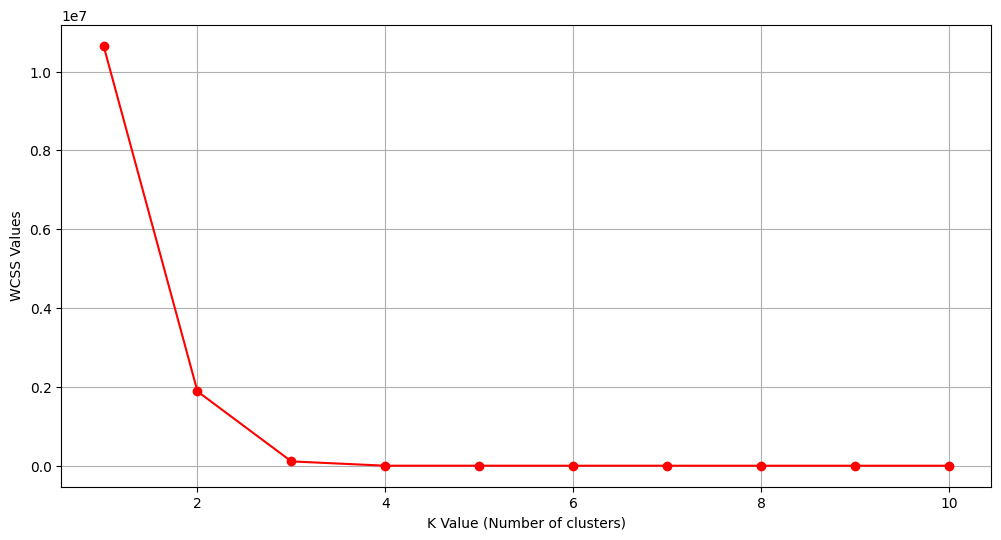

In [99]:
from sklearn.cluster import KMeans

# creating a blank list wcss
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value (Number of clusters)")
plt.ylabel("WCSS Values")
plt.show()

In [100]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)

#predict the labels of clusters.
label = kmeans.fit_predict(x1)

print(label)

[0 0 0 ... 1 1 1]


c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [101]:
print(kmeans.cluster_centers_)

[[ 7.5         0.67945821]
 [50.          0.87726194]
 [25.          0.77381209]]


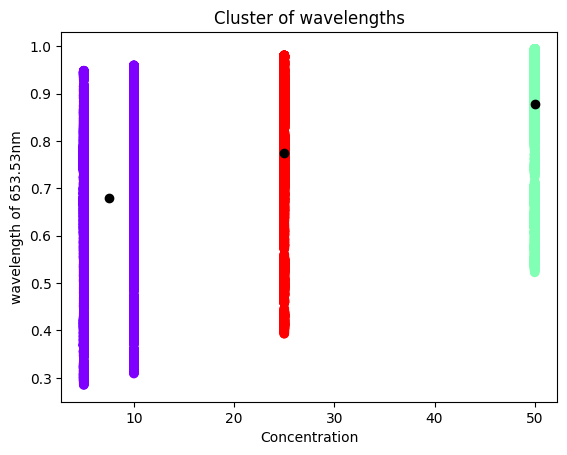

In [102]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')

#Plotting cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Cluster of wavelengths')
plt.xlabel('Concentration')
plt.ylabel('wavelength of 653.53nm')
plt.show()

In [103]:
x2 = df.loc[:, ["700.29nm", "752.63nm"]].values
x2

array([[0.80606127, 0.89134735],
       [0.81186962, 0.89490676],
       [0.80476898, 0.89023149],
       ...,
       [0.99986708, 0.99999744],
       [0.99987113, 0.9999975 ],
       [0.99986655, 0.99999726]])

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

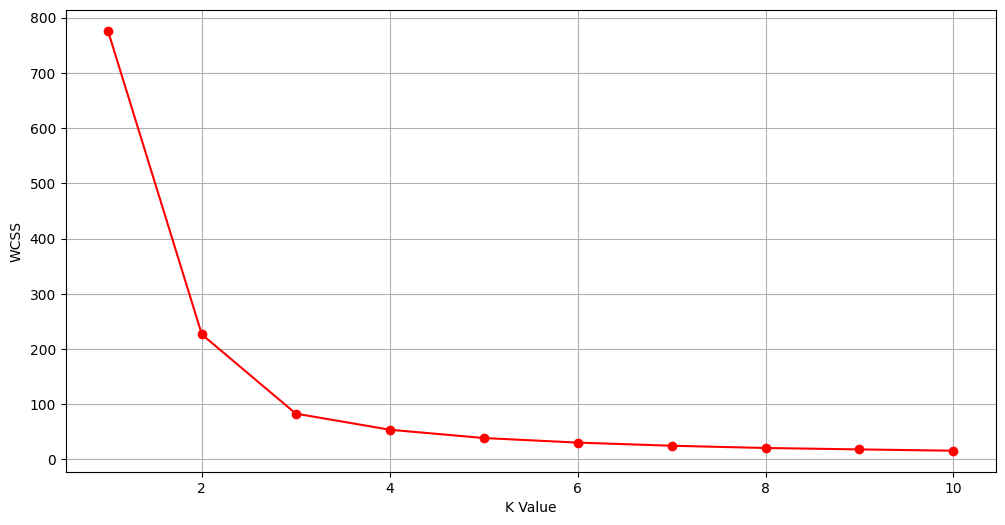

In [104]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [105]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x2)

print(label)

[1 1 1 ... 0 0 0]


c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [106]:
print(kmeans.cluster_centers_)

[[0.95887921 0.98837533]
 [0.80733201 0.86381993]
 [0.60249675 0.74922634]]


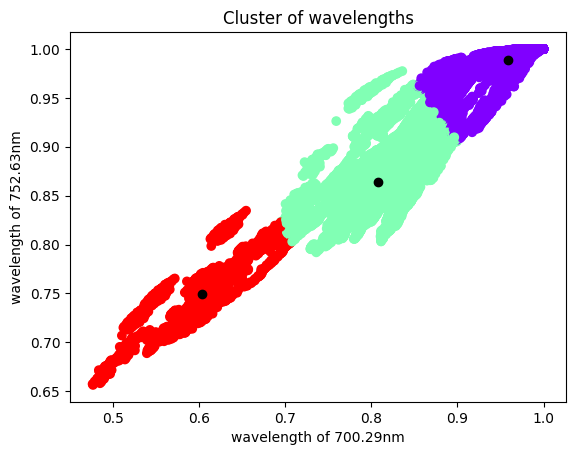

In [107]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap='rainbow')

#Plotting cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color='black')

plt.title('Cluster of wavelengths')
plt.xlabel('wavelength of 700.29nm')
plt.ylabel('wavelength of 752.63nm')
plt.show()

The K-Means Clustering graph I created signifies the clustering of data points based on their Ranman intensity values at two different wavelengths. Each data point is represented by its position in the 2D scatter plot, where the x-axis corresponds to the Ranman intensity at one wavelength, and the y-axis corresponds to the Ranman intensity at another wavelength.

If the clusters are well-separated and distinct, it indicates that the data points with similar Ranman intensity values at these two wavelengths tend to be grouped together.

If the clusters overlap significantly, it may suggest that these two wavelengths are not sufficient to distinguish clear clusters, and other combinations of wavelengths or dimensionality reduction techniques might be more appropriate.

In [108]:
x3 = df.loc[:, ["Concentration", "700.29nm", "752.63nm"]].values
x3

array([[ 5.        ,  0.80606127,  0.89134735],
       [ 5.        ,  0.81186962,  0.89490676],
       [ 5.        ,  0.80476898,  0.89023149],
       ...,
       [50.        ,  0.99986708,  0.99999744],
       [50.        ,  0.99987113,  0.9999975 ],
       [50.        ,  0.99986655,  0.99999726]])

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

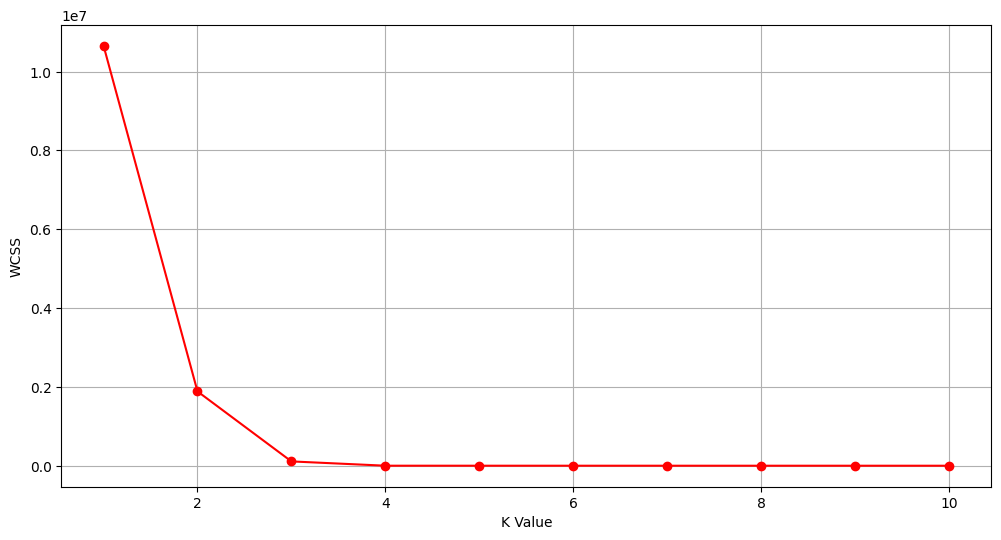

In [109]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, color="red", marker = "o")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [110]:
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x3)

print(label)

[0 0 0 ... 1 1 1]


c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [111]:
print(kmeans.cluster_centers_)

[[ 7.5         0.81091326  0.87254801]
 [50.          0.96319226  0.99110684]
 [25.          0.89302643  0.94601857]]


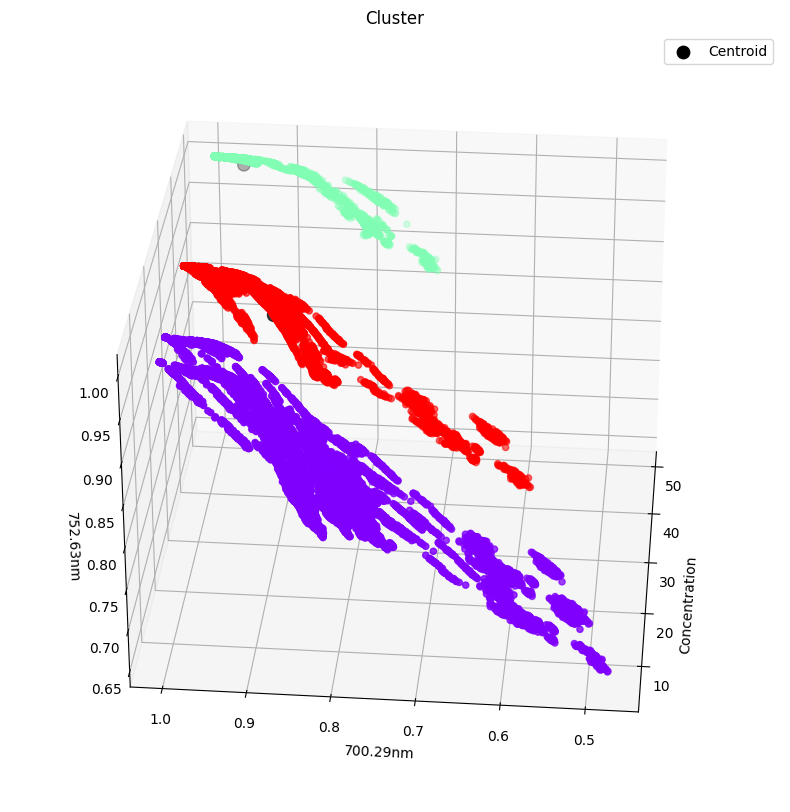

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3[:,0], x3[:,1], x3[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 80, color = 'black', label = 'Centroid')
ax.view_init(30, 185)

plt.title('Cluster')
plt.xlabel("Concentration")
plt.ylabel('700.29nm')
ax.set_zlabel('752.63nm')
plt.legend()
plt.show()

# MLP

In [113]:

# Split the dataset into input features (X) and labels (y)
X = df.iloc[:, 1:].values  # Exclude serial number and labels columns
#y = data.iloc[:, 1].values   # Labels column
y = df['Concentration'].values


In [114]:
X

array([[0.99997979, 0.99996698, 0.99920332, ..., 0.5440141 , 0.56267536,
        0.58312166],
       [0.99997991, 0.99996817, 0.99920785, ..., 0.5450747 , 0.56380868,
        0.58447212],
       [0.9999795 , 0.99996758, 0.99922037, ..., 0.54332924, 0.56197053,
        0.58242428],
       ...,
       [1.        , 0.99999738, 0.99917865, ..., 0.59908825, 0.62331808,
        0.64022422],
       [1.        , 0.9999975 , 0.99920905, ..., 0.59773105, 0.62207949,
        0.63891834],
       [1.        , 0.99999738, 0.9991827 , ..., 0.59756982, 0.62186253,
        0.63883132]])

In [115]:
X.shape[0]

34800

In [116]:
X.shape[1]

128

In [117]:
y

array([ 5,  5,  5, ..., 50, 50, 50], dtype=int64)

In [118]:
# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [120]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [121]:
# Create an MLP regression model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)



In [122]:
# Train the model on the training data
mlp_regressor.fit(X_train, y_train)



MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [123]:
# Make predictions on the test set
y_pred = mlp_regressor.predict(X_test)



In [124]:

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.3626389522643466


In [125]:

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.60219511145836


It looks like you have successfully calculated the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for your regression model's predictions. These metrics are used to assess the quality of the predictions made by the model.

Mean Squared Error (MSE): This metric quantifies the average squared difference between the predicted values and the actual values. Lower values of MSE indicate better model performance.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides a measure of the typical magnitude of the error. Like MSE, lower RMSE values indicate better model performance.

In the results you've provided:

Mean Squared Error: 0.3626389522643442
Root Mean Squared Error: 0.602195111458358
These values give you an idea of how well your MLP regression model is performing in terms of predicting honey concentration. Lower values of MSE and RMSE suggest that your model is making accurate predictions.

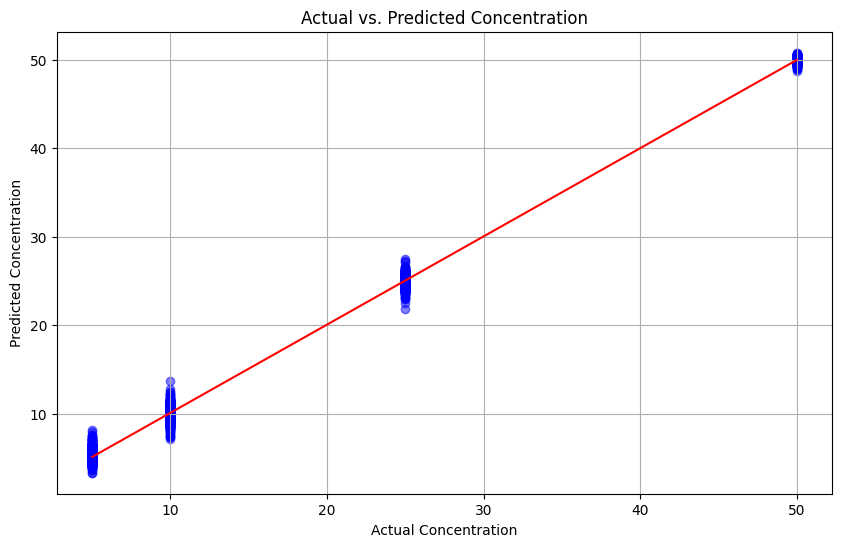

In [126]:
import numpy as np

# Create a scatter plot with line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('Actual Concentration')
plt.ylabel('Predicted Concentration')
plt.title('Actual vs. Predicted Concentration')
plt.grid(True)
plt.show()


In [127]:
# Define bins and labels
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']



In [128]:
# Convert concentration values to categories
y_train_class = pd.cut(y_train, bins=bins, labels=labels)
y_test_class = pd.cut(y_test, bins=bins, labels=labels)


Check the distribution of classes in your test set.

In [129]:
class_distribution = y_test_class.value_counts()
print(class_distribution)

0-10     1743
10-20       0
20-30     886
30-40       0
40-50     851
Name: count, dtype: int64


In [130]:

# Train an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train, y_train_class)



MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [131]:

# Predict categories
y_pred_class = mlp_classifier.predict(X_test)


In [132]:

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 1.0
